In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("data/lightening_strikes_dataset.csv")
df

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
...,...,...,...
3401007,2018-12-28,30,POINT(-90.6 28.7)
3401008,2018-12-28,30,POINT(-89.4 30.9)
3401009,2018-12-28,30,POINT(-89.5 31.4)
3401010,2018-12-28,30,POINT(-88.3 31.6)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [4]:
df.describe()

,number_of_strikes
count,3.401012e+06
mean,1.311403e+01
std,3.212099e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.200000e+01
max,2.211000e+03


In [5]:
df['date'] = pd.to_datetime(df['date'])

# Extract day of the year
df['day_of_year'] = df['date'].dt.dayofyear

# Map to sine and cosine components
df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

# Extract longitude and latitude from center_point_geom
df['longitude'] = df['center_point_geom'].str.extract(r'POINT\((-?\d+(\.\d+)?)\s')[0].astype(float)
df['latitude'] = df['center_point_geom'].str.extract(r'POINT\(-?\d+(\.\d+)?\s(-?\d+(\.\d+)?)\)')[1].astype(float)

df['longitude_latitude_interaction'] = df['longitude'] * df['latitude']
df = df.drop(columns=['date', 'center_point_geom'])
df

,number_of_strikes,day_of_year,sin_day,cos_day,longitude,latitude,longitude_latitude_interaction
0,194,3,0.05162,0.998667,-75.0,27.0,-2025.00
1,41,3,0.05162,0.998667,-78.4,29.0,-2273.60
2,33,3,0.05162,0.998667,-73.9,27.0,-1995.30
3,38,3,0.05162,0.998667,-73.8,27.0,-1992.60
4,92,3,0.05162,0.998667,-79.0,28.0,-2212.00
...,...,...,...,...,...,...,...
3401007,30,362,-0.05162,0.998667,-90.6,28.7,-2600.22
3401008,30,362,-0.05162,0.998667,-89.4,30.9,-2762.46
3401009,30,362,-0.05162,0.998667,-89.5,31.4,-2810.30
3401010,30,362,-0.05162,0.998667,-88.3,31.6,-2790.28


In [6]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

X_train = train_df.drop(columns=['number_of_strikes'])
y_train = train_df["number_of_strikes"]

X_test = test_df.drop(columns=['number_of_strikes'])
y_test = test_df["number_of_strikes"]

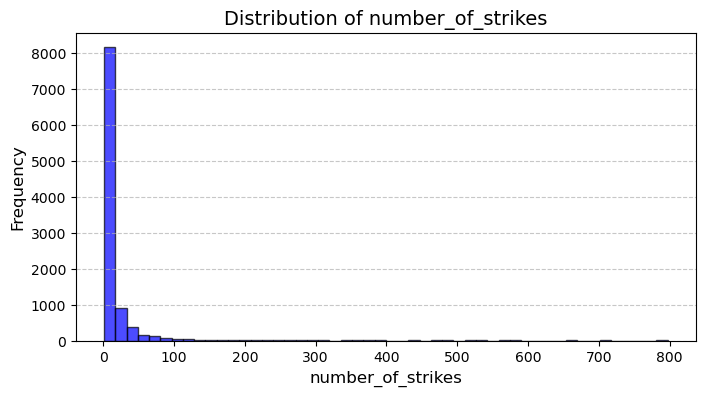

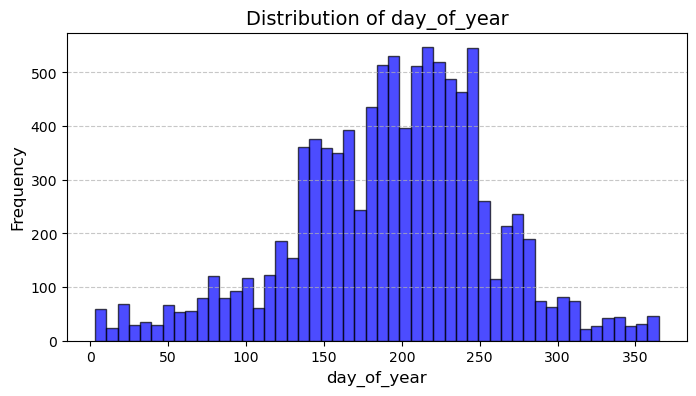

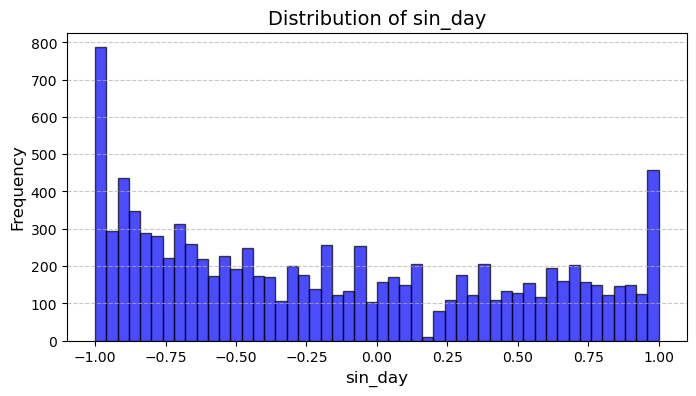

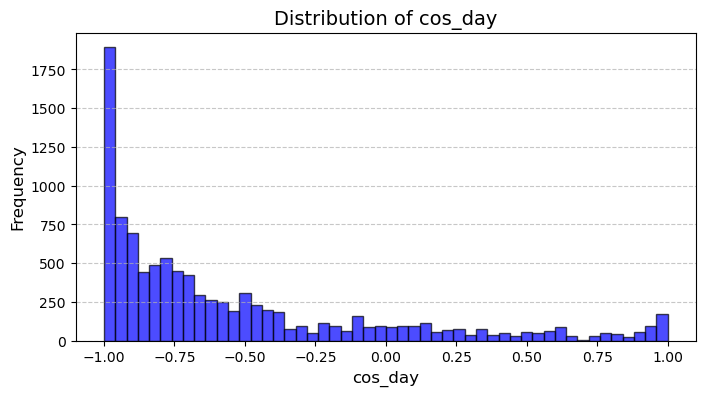

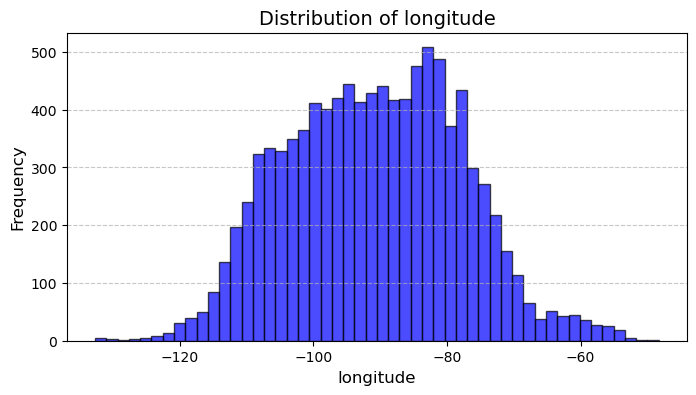

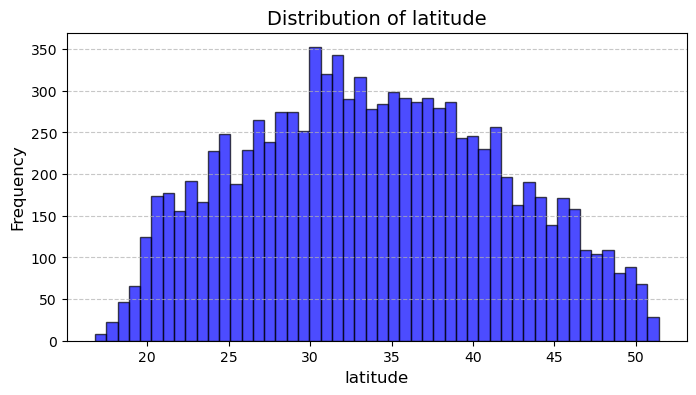

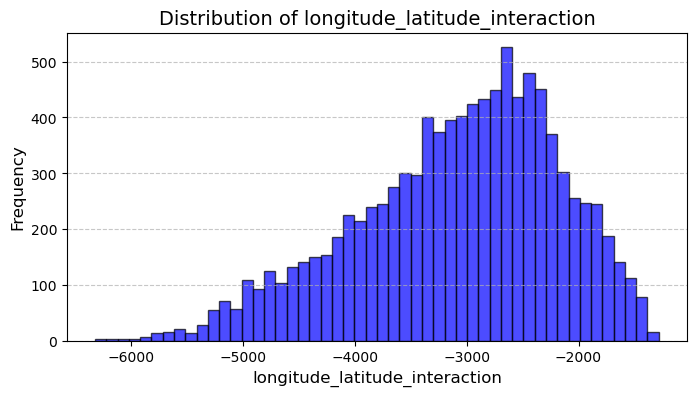

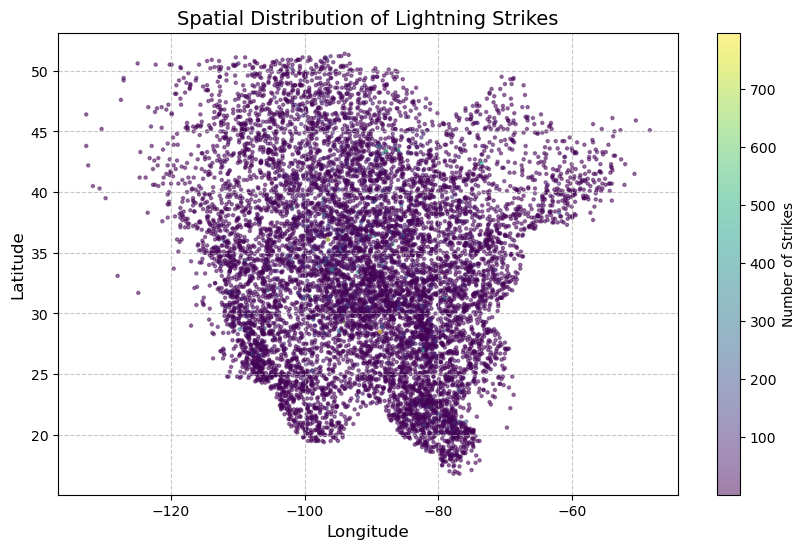

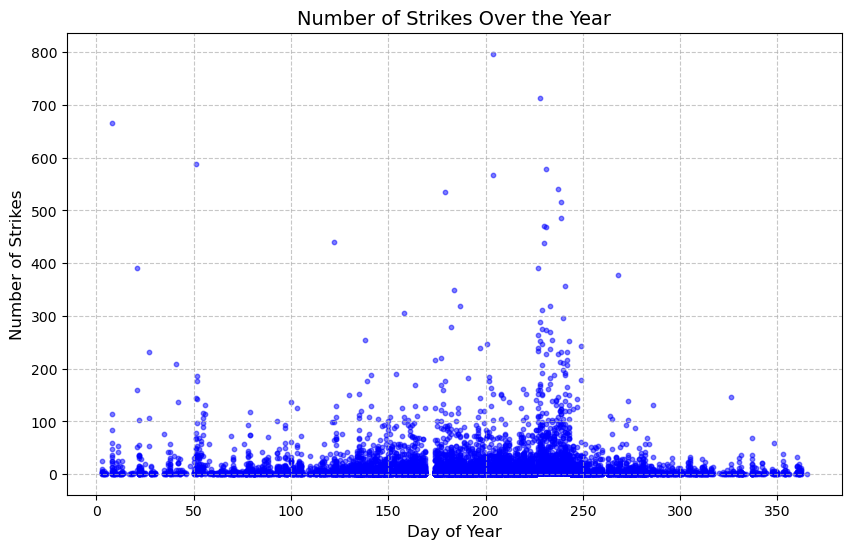

In [7]:
import matplotlib.pyplot as plt

# Select a subset of the training data for visualization
sample_df = train_df.sample(10000, random_state=42)  # Use a subset for plotting efficiency

# Define numeric features to visualize
numeric_features = [
    "number_of_strikes",
    "day_of_year",
    "sin_day",
    "cos_day",
    "longitude",
    "latitude",
    "longitude_latitude_interaction",
]

# Plot histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    plt.hist(sample_df[feature], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Scatter plot: Longitude vs Latitude (Spatial Distribution)
plt.figure(figsize=(10, 6))
plt.scatter(
    sample_df['longitude'], 
    sample_df['latitude'], 
    c=sample_df['number_of_strikes'], 
    cmap='viridis', 
    s=5, 
    alpha=0.5
)
plt.colorbar(label='Number of Strikes')
plt.title("Spatial Distribution of Lightning Strikes", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Scatter plot: Day of Year vs Number of Strikes
plt.figure(figsize=(10, 6))
plt.scatter(
    sample_df['day_of_year'], 
    sample_df['number_of_strikes'], 
    alpha=0.5, 
    s=10, 
    c='blue'
)
plt.title("Number of Strikes Over the Year", fontsize=14)
plt.xlabel("Day of Year", fontsize=12)
plt.ylabel("Number of Strikes", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [8]:
# Step 1: Define the first ColumnTransformer for feature engineering
def feature_engineering(df):
    # Extract day_of_year, sin_day, and cos_day
    df['date'] = pd.to_datetime(df['date'])
    df['day_of_year'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    
    # Extract longitude and latitude
    df['longitude'] = df['center_point_geom'].str.extract(r'POINT\((-?\d+(\.\d+)?)\s')[0].astype(float)
    df['latitude'] = df['center_point_geom'].str.extract(r'POINT\(-?\d+(\.\d+)?\s(-?\d+(\.\d+)?)\)')[1].astype(float)
    
    # Create interaction term
    df['longitude_latitude_interaction'] = df['longitude'] * df['latitude']
    
    # Drop unnecessary columns
    df = df.drop(columns=['date', 'center_point_geom'])
    return df

# Create a transformer for feature engineering
feature_engineering_transformer = FunctionTransformer(feature_engineering)

# Step 2: Define the second ColumnTransformer for scaling
numeric_features = [
    "day_of_year", "sin_day", "cos_day", "longitude", 
    "latitude", "longitude_latitude_interaction"
]

scaling_transformer = make_column_transformer(
    (StandardScaler(), numeric_features),  # Scale numeric features
    remainder="passthrough"  # Keep "number_of_strikes" untouched (target variable)
)


# # Pipeline for the full model (same structure)
# full_model_pipeline = make_pipeline(
#     feature_engineering_transformer,  # Step 1: Feature engineering
#     scaling_transformer,              # Step 2: Scaling
#     RandomForestRegressor(random_state=42)  # Final model
# )



In [9]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

# Add additional models to the dictionary
models = {
    "kNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [11]:
# # Initialize a dictionary to store results
# results_dict = {}

# # Loop through models and perform cross-validation
# for name in models:
#     pipe = make_pipeline(scaling_transformer, models[name], verbose=True)
#     print(f'{name} cross validation...')
    
#     # Perform cross-validation
#     results_dict[name] = mean_std_cross_val_scores(
#         pipe, X_train, y_train, cv=4, return_train_score=True
#     )
    
#     # Save the results to a CSV after each model finishes
#     results_df = pd.DataFrame(results_dict).T
#     results_df.to_csv("model_cross_validation_results.csv", index_label="Model Name")
    
#     print(f'\n{name} done and saved to CSV!\n')

# # Final results DataFrame
# results_df = pd.DataFrame(results_dict).T

In [12]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import make_pipeline
# import pandas as pd

# # Initialize results dictionary
# results = {}

# ### 1. KNN Optimization ###
# print("Running GridSearchCV for KNN...")
# knn_param_grid = {
#     "kneighborsregressor__n_neighbors": list(range(7, 31)),  # Test 7 to 30 neighbors
#     "kneighborsregressor__weights": ["uniform", "distance"],  # Weighting strategies
#     "kneighborsregressor__p": [1, 2],  # Distance metrics (1=Manhattan, 2=Euclidean)
# }

# knn_pipeline = make_pipeline(scaling_transformer, KNeighborsRegressor(), verbose=True)
# knn_grid_search = GridSearchCV(
#     knn_pipeline,
#     knn_param_grid,
#     cv=5,
#     scoring="neg_mean_absolute_error",
#     n_jobs=-1,
#     verbose=2,
# )

# knn_grid_search.fit(X_train, y_train)

# # Save best KNN results
# results["KNN"] = {
#     "best_params": knn_grid_search.best_params_,
#     "best_score": -knn_grid_search.best_score_,
# }
# print(f"KNN best parameters: {knn_grid_search.best_params_}")
# print(f"KNN best score: {-knn_grid_search.best_score_:.2f}")

# ### 2. Decision Tree Depth Selection ###
# print("Running GridSearchCV for Decision Tree to find max_depth...")
# tree_param_grid = {
#     "decisiontreeregressor__max_depth": [5, 10, 15, 20, 25, None],  # Test different depths
#     "decisiontreeregressor__min_samples_split": [2, 5, 10],  # Additional parameters
# }

# tree_pipeline = make_pipeline(scaling_transformer, DecisionTreeRegressor(random_state=42))
# tree_grid_search = GridSearchCV(
#     tree_pipeline,
#     tree_param_grid,
#     cv=5,
#     scoring="neg_mean_absolute_error",
#     n_jobs=-1,
#     verbose=2,
# )

# tree_grid_search.fit(X_train, y_train)

# # Extract top 3 depths based on the best scores
# tree_results = pd.DataFrame(tree_grid_search.cv_results_)
# tree_results = tree_results.sort_values(by="mean_test_score", ascending=False)
# top_depths = tree_results["param_decisiontreeregressor__max_depth"].iloc[:3].tolist()

# results["DecisionTree"] = {
#     "best_params": tree_grid_search.best_params_,
#     "best_score": -tree_grid_search.best_score_,
# }
# print(f"Top 3 depths for Random Forest: {top_depths}")



In [13]:
# ### 3. Random Forest Optimization ###
# print("Running GridSearchCV for Random Forest with selected depths...")
# rf_param_grid = {
#     "randomforestregressor__n_estimators": [50, 100, 200],  # Number of trees
#     "randomforestregressor__max_depth": top_depths,  # Use top 3 depths from Decision Tree
#     "randomforestregressor__min_samples_split": [2, 5, 10],  # Minimum samples to split a node
#     "randomforestregressor__min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
# }

# rf_pipeline = make_pipeline(scaling_transformer, RandomForestRegressor(random_state=42))
# rf_grid_search = GridSearchCV(
#     rf_pipeline,
#     rf_param_grid,
#     cv=5,
#     scoring="neg_mean_absolute_error",
#     n_jobs=-1,
#     verbose=2,
# )

# rf_grid_search.fit(X_train, y_train)

# # Save best Random Forest results
# results["RandomForest"] = {
#     "best_params": rf_grid_search.best_params_,
#     "best_score": -rf_grid_search.best_score_,
# }
# print(f"Random Forest best parameters: {rf_grid_search.best_params_}")
# print(f"Random Forest best score: {-rf_grid_search.best_score_:.2f}")

# ### Save Results to CSV ###
# results_df = pd.DataFrame(results).T
# results_df.to_csv("hyperparameter_optimization_results.csv", index_label="Model")

# print("Hyperparameter optimization complete. Results saved to 'hyperparameter_optimization_results.csv'.")

In [ ]:
# Define the models with the best parameters
models = {
    "KNN": KNeighborsRegressor(
        n_neighbors=7, weights="distance", p=2
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42
    )
}

# Initialize a dictionary to store results
results_dict = {}

# Perform cross-validation
for name in models:
    pipe = make_pipeline(scaling_transformer, models[name], verbose=True)
    print(f'{name} cross validation...')
    
    # Perform cross-validation
    results_dict[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=4, return_train_score=True
    )
    
    # Save the results to a CSV after each model finishes
    results_df = pd.DataFrame(results_dict).T
    results_df.to_csv("final_model_cross_validation_results.csv", index_label="Model Name")
    
    print(f'\n{name} done and saved to CSV!\n')

# Final results DataFrame
results_df = pd.DataFrame(results_dict).T
print("Final Cross-Validation Results:")
print(results_df)

KNN cross validation...
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline]  (step 2 of 2) Processing kneighborsregressor, total=   0.7s
[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline]  (step 2 of 2) Processing kneighborsregressor, total=   0.6s
